### Importing Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Reading Data

In [25]:
df = pd.read_csv('../data/heart_disease.csv')

print("Shape: ", df.shape)
print(df.head())

Shape:  (303, 14)
    age  sex   cp  trestbps   chol  ...  oldpeak  slope   ca  thal  target
0  63.0  1.0  1.0     145.0  233.0  ...      2.3    3.0  0.0   6.0       0
1  67.0  1.0  4.0     160.0  286.0  ...      1.5    2.0  3.0   3.0       2
2  67.0  1.0  4.0     120.0  229.0  ...      2.6    2.0  2.0   7.0       1
3  37.0  1.0  3.0     130.0  250.0  ...      3.5    3.0  0.0   3.0       0
4  41.0  0.0  2.0     130.0  204.0  ...      1.4    1.0  0.0   3.0       0

[5 rows x 14 columns]


### Checking for Missing Values and Data Types

In [35]:
df.replace('?', np.nan, inplace=True)

In [37]:
print(df.isna().sum())
print(df.dtypes)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object


In [38]:
# Convert columns to numeric
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

In [39]:
df['ca'].fillna(df['ca'].median(), inplace=True)
df['thal'].fillna(df['thal'].median(), inplace=True)

C:\Users\ehabk\AppData\Local\Temp\ipykernel_24552\516730923.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ca'].fillna(df['ca'].median(), inplace=True)
C:\Users\ehabk\AppData\Local\Temp\ipykernel_24552\516730923.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [41]:
print(df.isna().sum())
print(df.dtypes)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object


### Standardizing Data Using StandardScaler


In [42]:
numerical_cols = df.columns[df.columns != 'target']
print("Numerical columns: ", numerical_cols)

Numerical columns:  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [43]:
scalar = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scalar.fit_transform(df[numerical_cols])

In [44]:
df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.711131,0.660004,0
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.504881,-0.890238,2
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.432877,1.176752,1
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.711131,-0.890238,0
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.711131,-0.890238,0


### Exploring Data Using Histograms, Correlation Heatmap, and Box Plots

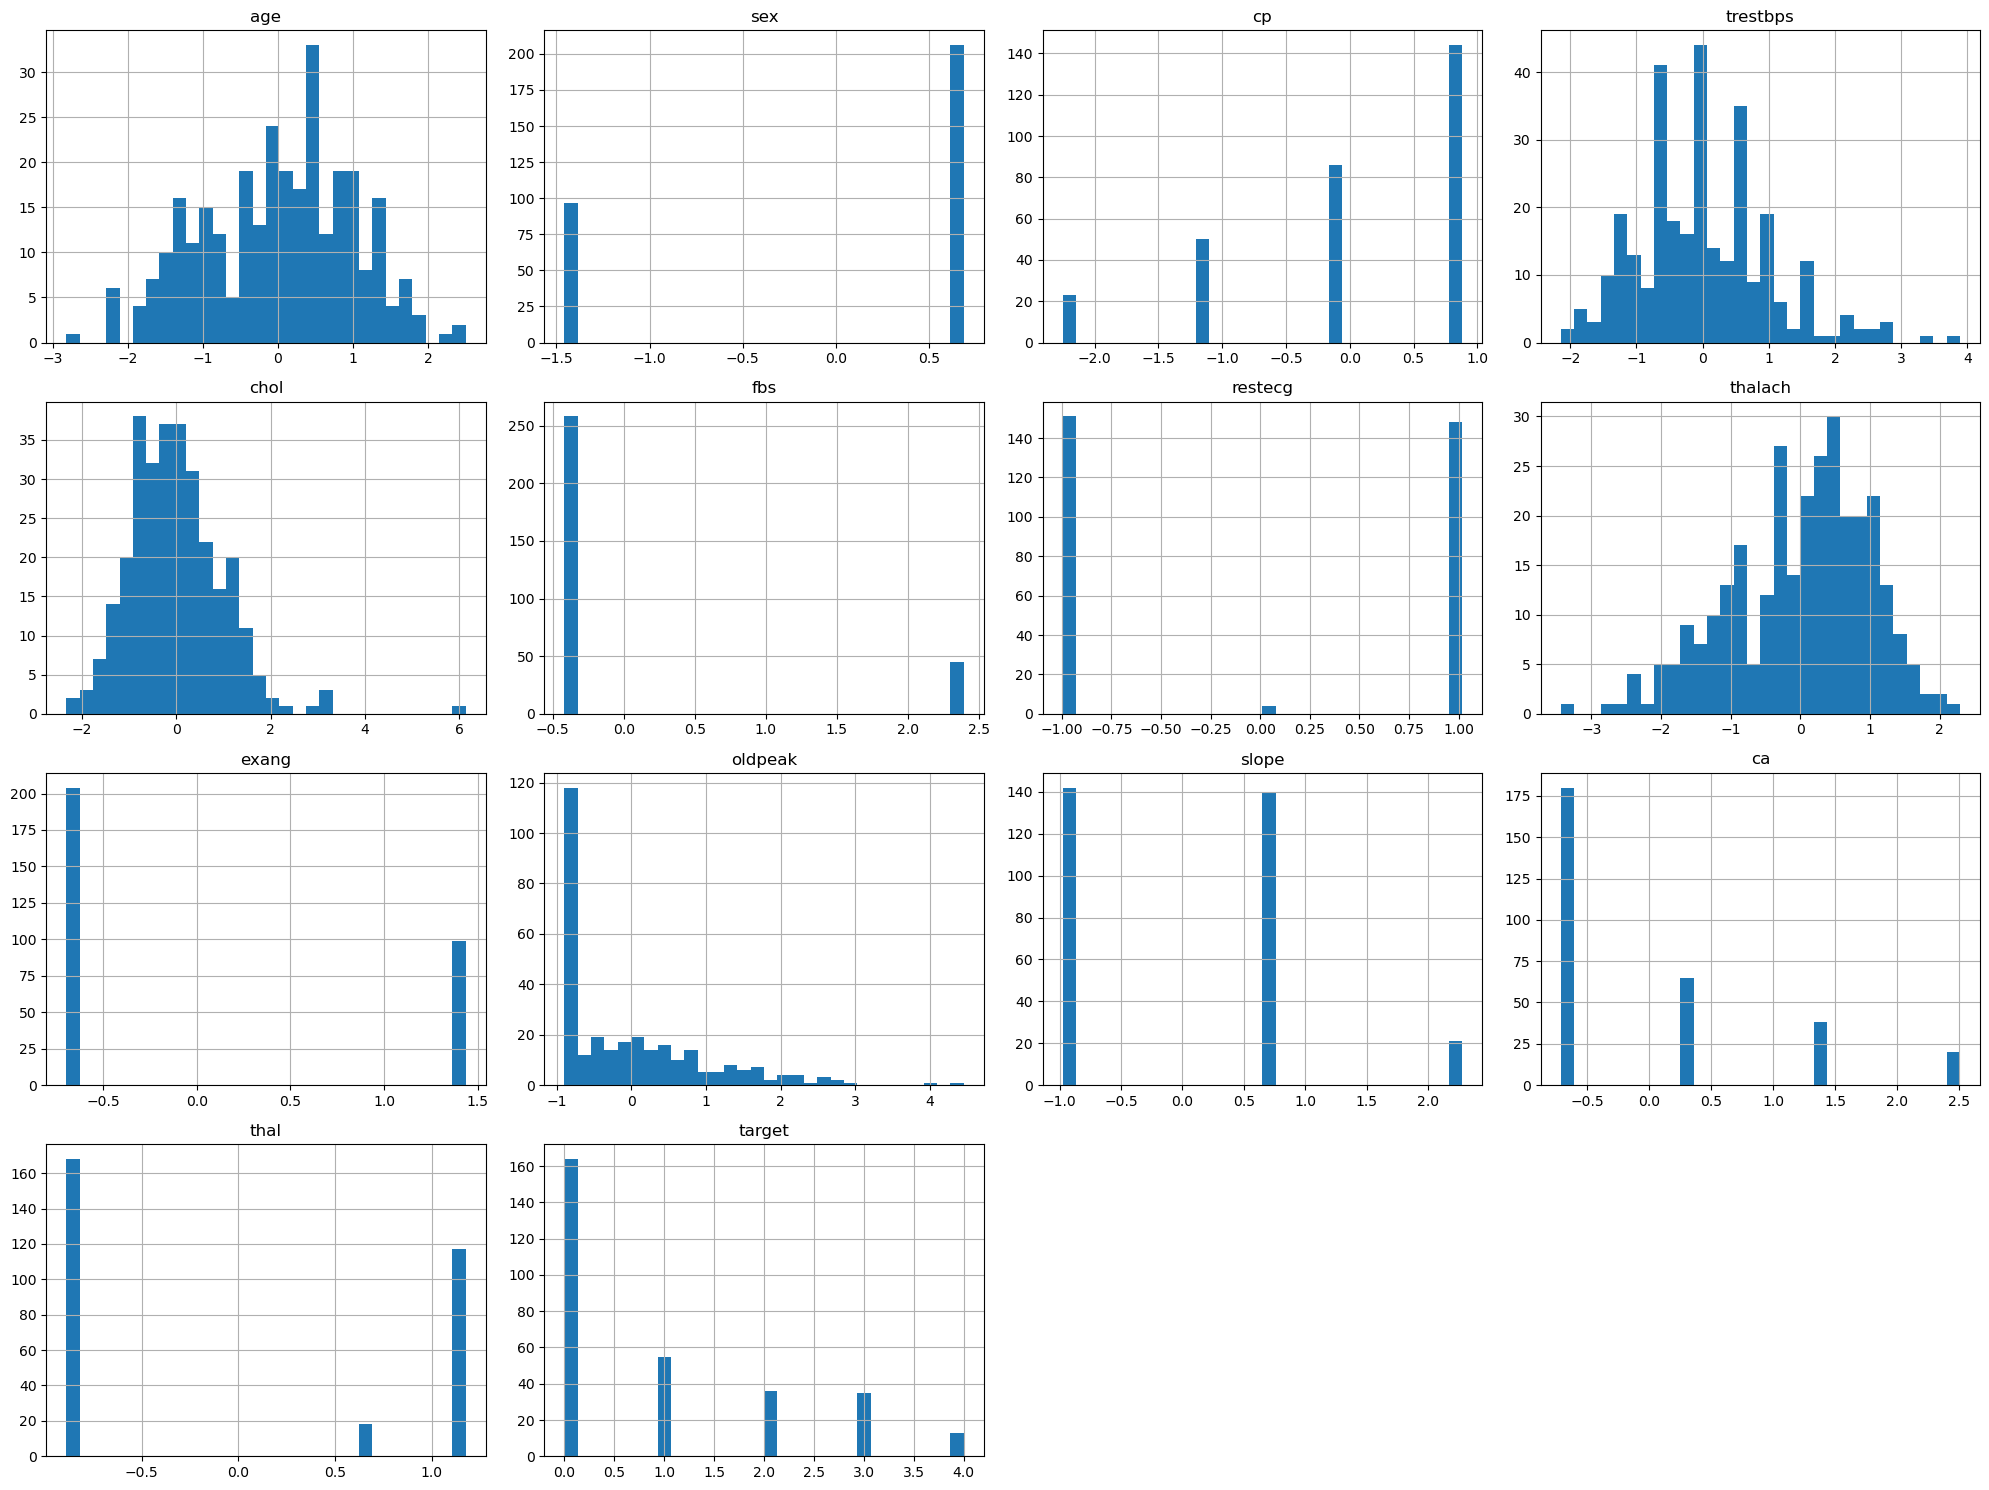

In [45]:
df_scaled.hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()

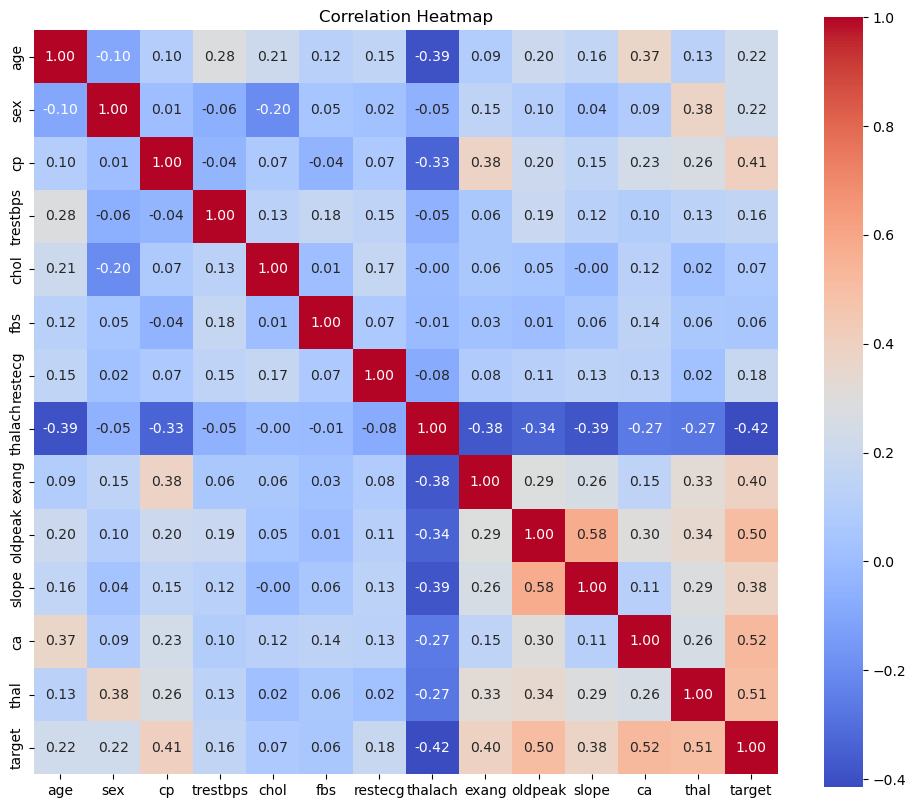

In [46]:
correlation_matrix = df_scaled.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

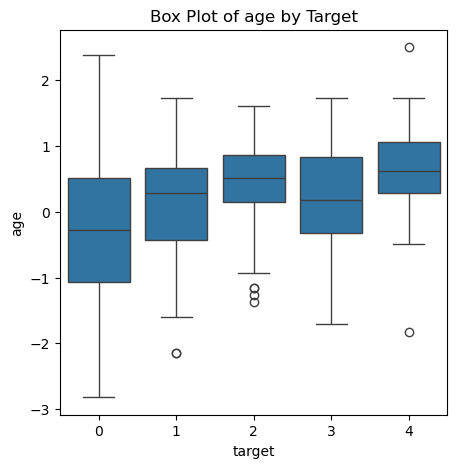

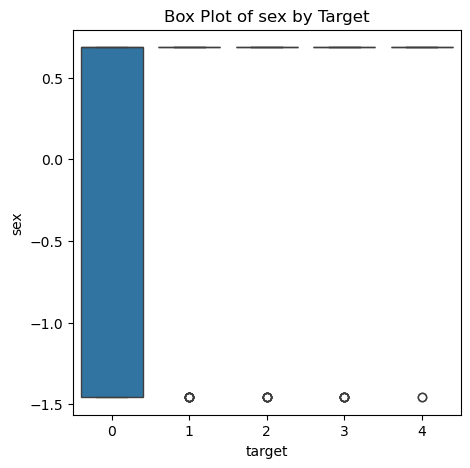

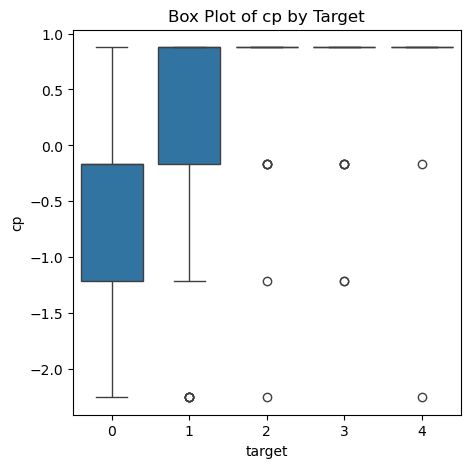

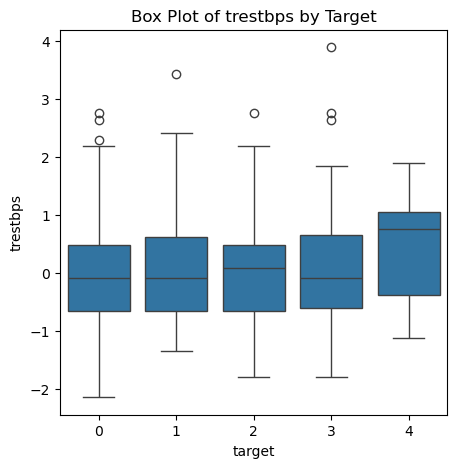

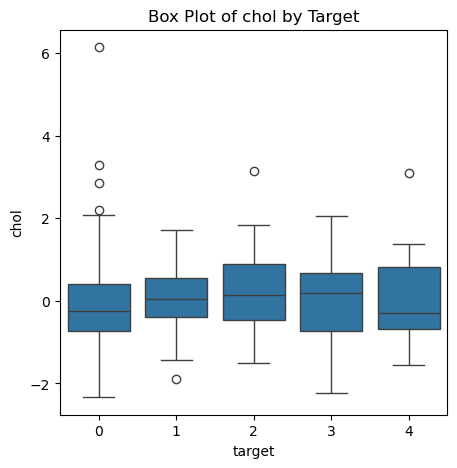

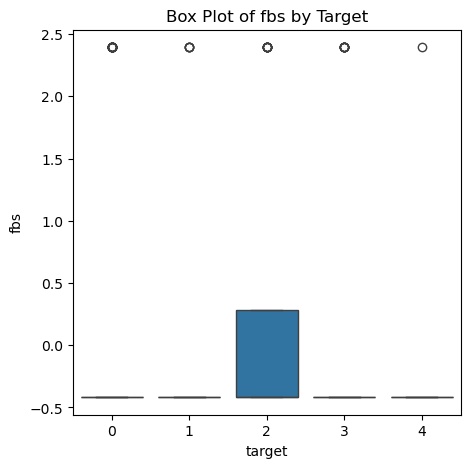

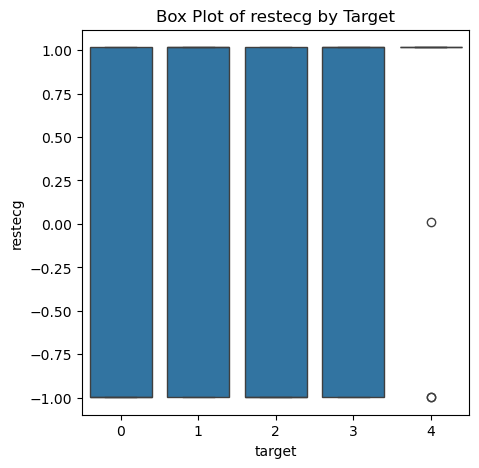

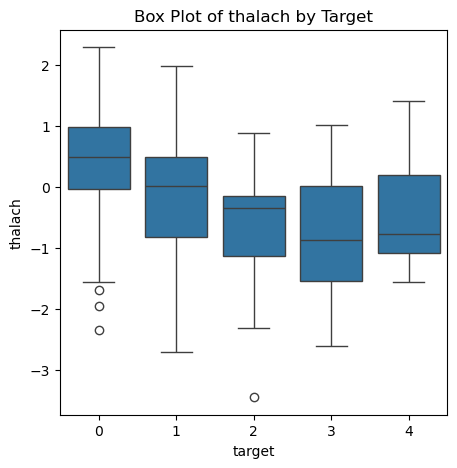

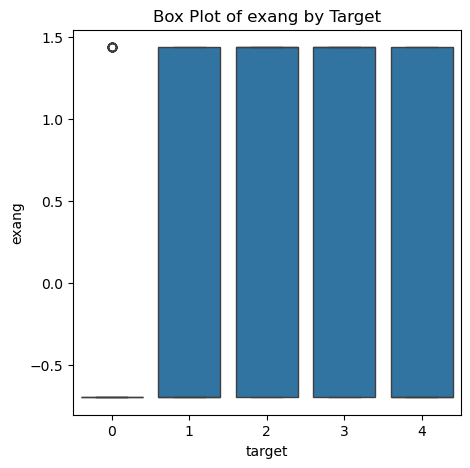

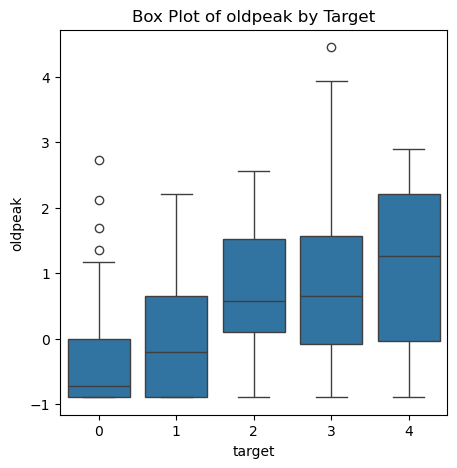

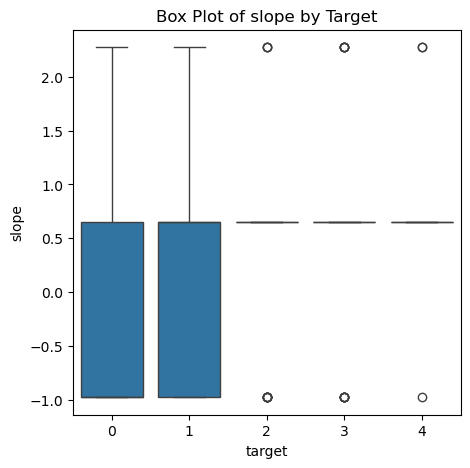

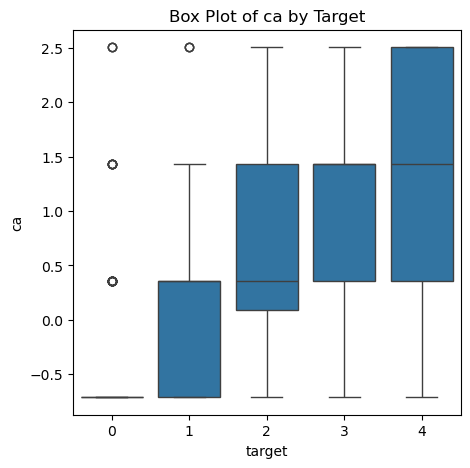

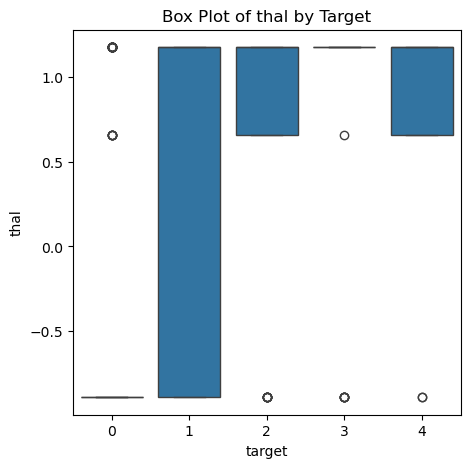

In [53]:
for col in numerical_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x='target', y=col, data=df_scaled)
    plt.title(f'Box Plot of {col} by Target')
    plt.show()

### Saving Processed Data

In [54]:
df_scaled.to_csv('../data/heart_disease_processed.csv', index=False)